In [1]:
%load_ext autoreload
%autoreload 2

matrix shape,  torch.Size([7, 6, 5, 4, 3, 10, 24, 24]) blocks shape,  torch.Size([7, 6, 5, 4, 3, 10, 5, 6, 6])


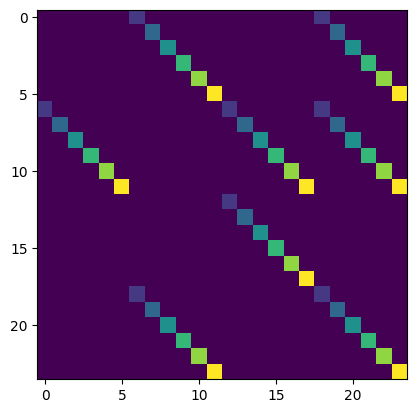

In [53]:
import torch
from block_sparse import SemiRegSpraseBCSR
import matplotlib.pyplot as plt


ptr = [0, 2, 5, 6, 8]
indices = [1, 3, 0, 2, 3, 2, 1, 3]
data = [1, 1, 1, 0, 2, 1, 2, 0] 
block = torch.diag(torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0, 6.0]))
blocks = torch.stack([block for i in range(5)], dim=0)
blocks = torch.stack([blocks for i in range(10)], dim=0)
blocks = torch.stack([blocks for i in range(3)], dim=0)
blocks = torch.stack([blocks for i in range(4)], dim=0)
blocks = torch.stack([blocks for i in range(5)], dim=0)
blocks = torch.stack([blocks for i in range(6)], dim=0)
blocks = torch.stack([blocks for i in range(7)], dim=0)

bcsr = SemiRegSpraseBCSR((4, 4), ptr, indices, data, blocks)
dense = bcsr.to_dense()
print("matrix shape, ", dense.shape, "blocks shape, ", bcsr.blocks.shape)
plt.imshow(dense[0, 0, 0, 0, 0, 0])
# plt.imshow(dense[0])

In [54]:
bcsr.shape

torch.Size([7, 6, 5, 4, 3, 10, 24, 24])

In [55]:
a = torch.rand(2, 2, 2, 2, 2, 2, 24, 24)

a[0, 0, 0, 0, 0, 0, 6:, 12:18].shape

torch.Size([18, 6])

# multi dims much? HA!

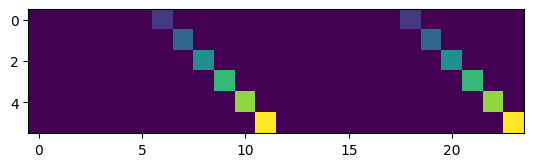

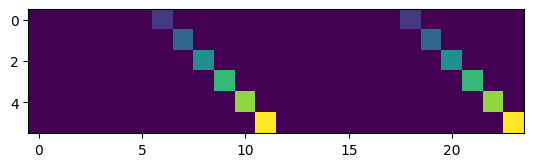

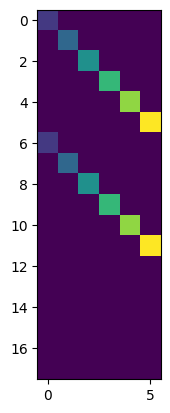

In [56]:
plt.imshow(bcsr[..., 18:, :][0, 0, 0, 0, 0, 0].to_dense())
# plt.imshow(bcsr[0, 18:, :].to_dense())
plt.show()
plt.imshow(bcsr[0, 0, 0, 0, 0, 0, 18:, ...].to_dense())
# plt.imshow(bcsr[0, 18:, ...].to_dense())
plt.show()
plt.imshow(bcsr[0, 0, 0, 0, 0, 0, 6:, 12:18].to_dense())
# plt.imshow(bcsr[0, 6:, 12:18].to_dense())

# bcsr matmul

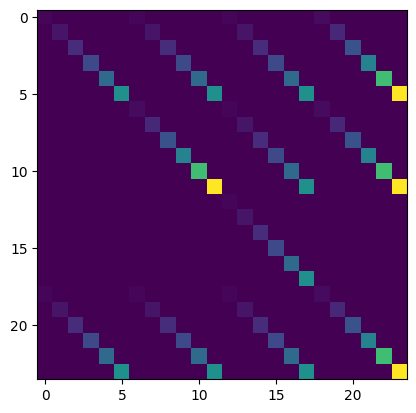

In [90]:
a = bcsr.matmul(bcsr)
plt.imshow(a[0, 0, 0, 0, 0, 0])

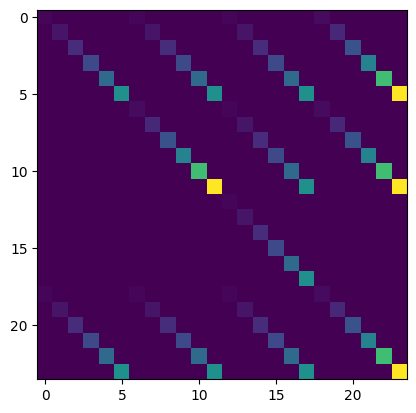

In [89]:
a = bcsr.to_dense()
b = torch.matmul(a, a)
plt.imshow(b[0, 0, 0, 0, 0, 0])

In [124]:
a = SemiRegSpraseBCSR((4, 4), ptr, indices, data, blocks)

b = torch.stack([a, a], dim=0)
b = torch.stack([b, b, b], dim=0)
# b = torch.stack([b, b, b, b, b], dim=0)
# b = torch.stack([b, b, b, b, b, b, b], dim=0)
b

Sparse Block Compressed Sparse Row matrix of shape (4, 4) and block size 4

In [130]:
b.get_row(1).shape

torch.Size([3, 2, 3, 4, 4])

In [105]:
crow_indices = [0, 1, 2]
col_indices = [0, 1]
values = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
a = torch.sparse_bsr_tensor(torch.tensor(crow_indices, dtype=torch.int64),
                         torch.tensor(col_indices, dtype=torch.int64),
                         torch.tensor(values), dtype=torch.double)
a[0]

tensor(crow_indices=tensor([0, 1, 2]),
       col_indices=tensor([0, 1]),
       values=tensor([[[1., 2.],
                       [3., 4.]],

                      [[5., 6.],
                       [7., 8.]]]), size=(4, 4), nnz=2, dtype=torch.float64,
       layout=torch.sparse_bsr)

In [65]:
ptr = [0, 0, 3, 4, 6]
indices = [0, 2, 3, 2, 1, 3]
data = [1, 0, 2, 1, 2, 0] 
crow_indices = [0, 2, 4]
col_indices = [0, 1, 0, 1]
values = [1, 2, 3, 4]
torch.sparse_csr_tensor(torch.tensor(ptr, dtype=torch.int64),
                         torch.tensor(indices, dtype=torch.int64),
                         torch.tensor(data), dtype=torch.double).to_dense()

tensor([[0., 0., 0., 0.],
        [1., 0., 0., 2.],
        [0., 0., 1., 0.],
        [0., 2., 0., 0.]], dtype=torch.float64)

In [217]:
a = [[1, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0]]

a = torch.tensor(a)
a = a.to_sparse_csr()
a = a[:3]

RuntimeError: Sparse CSR tensors do not have strides

In [210]:
a = [[1, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0]]

a = torch.tensor(a)
crow_indices = a.to_sparse_csr().crow_indices()[0:5]
col_indices = a.to_sparse_csr().col_indices()[crow_indices[0]:crow_indices[-1]]
values = a.to_sparse_csr().values()[crow_indices[0]:crow_indices[-1]]
crow_indices = [0] + [p-crow_indices[0] for p in crow_indices[1:]]

print(crow_indices, col_indices, values)

print(a[:4, :2].to_sparse_csr().crow_indices(),
a[:4, :2].to_sparse_csr().col_indices(),
a[:4, :2].to_sparse_csr().values(),)
print(a[:4, :2].to_sparse_csr().to_dense())

[0, tensor(1), tensor(1), tensor(1), tensor(1)] tensor([0]) tensor([1])
tensor([0, 1, 1, 1, 1]) tensor([0]) tensor([1])
tensor([[1, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [97]:
len(a)

8

In [41]:
a = torch.ones(4, 4)
b = torch.zeros(4, 4)

c = a * 2
d = b

aa = torch.stack([a, b], dim=0)
cc = torch.stack([c, d], dim=0)

torch.matmul(aa, cc)


tensor([[[8., 8., 8., 8.],
         [8., 8., 8., 8.],
         [8., 8., 8., 8.],
         [8., 8., 8., 8.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])